https://www.kaggle.com/competitions/playground-series-s3e2/discussion


https://www.kaggle.com/competitions/playground-series-s3e1/discussion

In [22]:
DATA_DIR='playground-series-s3e2/'

In [7]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import importlib

In [50]:
#load and reload if changed functions for data investigation, plots etc
import data_investigation_lib as DI
importlib.reload(data_investigation_lib);

In [68]:
df=pd.read_csv(DATA_DIR+"/train.csv").iloc[:,1:] #drop ID
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [69]:
df.describe(percentiles=[0, 1/3, 2/3, 1])

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
0%,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
33.3%,32.000000,0.000000,0.000000,78.790000,25.000000,0.000000
50%,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
66.7%,53.000000,0.000000,0.000000,92.670000,30.200000,0.000000
100%,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000
max,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [45]:
DI.nans(df)

0 rows with nans out of 15304
0 nans id
0 nans gender
0 nans age
0 nans hypertension
0 nans heart_disease
0 nans ever_married
0 nans work_type
0 nans Residence_type
0 nans avg_glucose_level
0 nans bmi
0 nans smoking_status
0 nans stroke


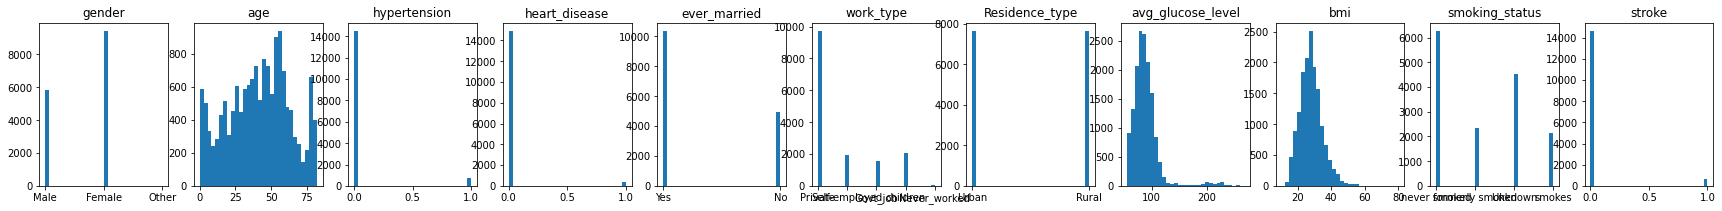

In [53]:
DI.hists(df)

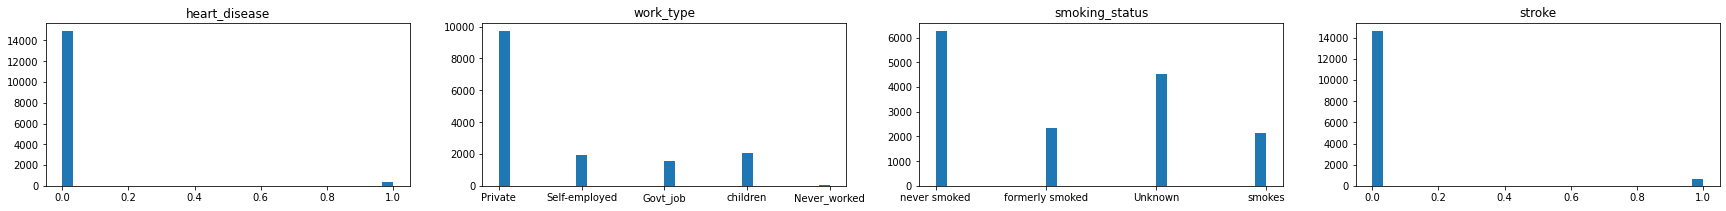

In [77]:
DI.hists(df.loc[:,['heart_disease','work_type','smoking_status','stroke']]) #closer look

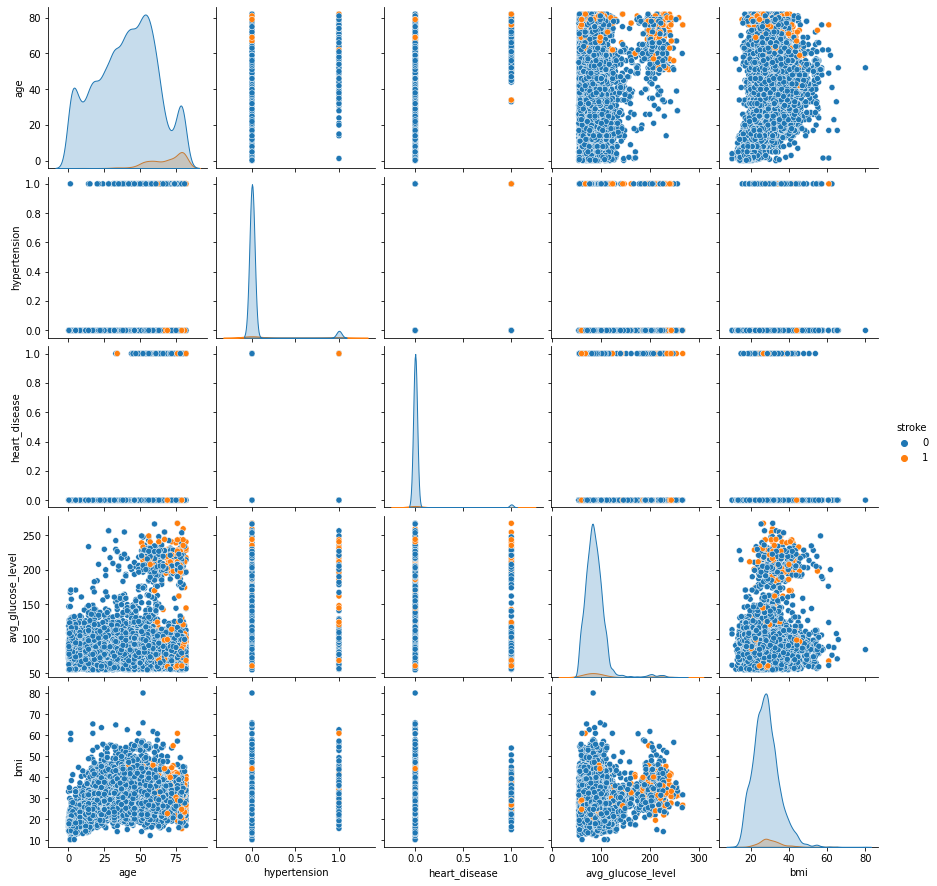

In [107]:
import seaborn as sns
sns.pairplot(df,hue="stroke")

In [96]:
from catboost import CatBoostClassifier, Pool, cv
cat = CatBoostClassifier()

cat_feats=[]
for i in range(len(df.columns)):
    if df.dtypes[i]==np.object_:
        cat_feats.append(i)

X=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values
N=df.shape[0]
tr=N*9//10
cat.fit(X[:tr],y[:tr],cat_features=cat_feats,plot=True,verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

[[1472   55]
 [   1    3]]


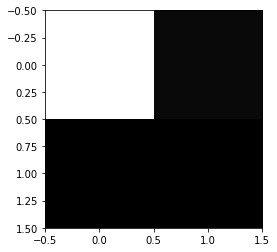

In [102]:
from sklearn.metrics import confusion_matrix
y_pred=cat.predict(X[tr:])
plt.imshow(confusion_matrix(y_pred,y[tr:]),'gray')
print(confusion_matrix(y_pred,y[tr:]))